In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from ydata_profiling import ProfileReport

/Users/shreyas/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/shreyas/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [4]:
df = pd.read_csv('smoking_driking_dataset.csv')


Adding a copy of df to find correlations easier


In [5]:
df_copy = df.copy()
df_copy['DRK_YN'] = np.where(df_copy['DRK_YN'] == 'Y', 1, 0)

In [6]:
df.head()


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


### Checking if data is pre-processeed (Free of null values)


In [7]:
df.describe()


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [8]:
df.isnull().sum()


sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [9]:
df["age"].value_counts()


40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: age, dtype: int64

In [10]:
# ProfileReport(df_copy)

# Open the Report.html to look through the report


The report suggests that drinking probabilities are linked to the following columns :

Format : _*Column*_ : _*Correlation*_

1. Age : -0.284
2. Height : 0.375
3. Weight : 0.26
4. Sight-left/sight-right : 0.132
5. Haemoglobin : 0.28
7. Sex : 0.369
8. SMK_stat_type_cd : 0.365


## Data visualization


### _1. Age vs Drinking Status_


In [11]:
# Finding the correlation between the variables age and drinking
df_copy['age'].corr(df_copy['DRK_YN'])

-0.28458708659581594

<Axes: title={'center': 'Age vs Drinking'}, xlabel='age', ylabel='DRK_YN'>

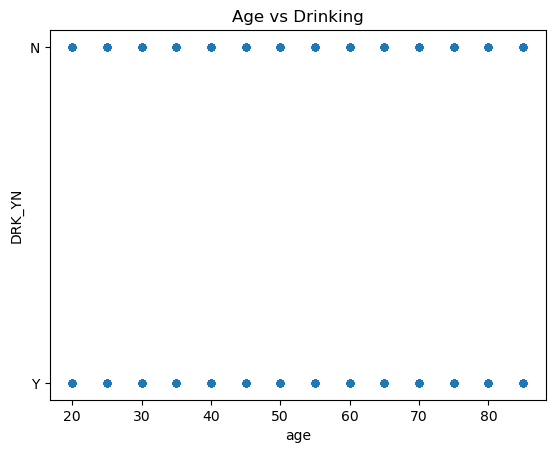

In [12]:
df.plot(kind='scatter', x='age', y='DRK_YN', title='Age vs Drinking')

<Axes: title={'center': 'Age vs Drinking'}, xlabel='age'>

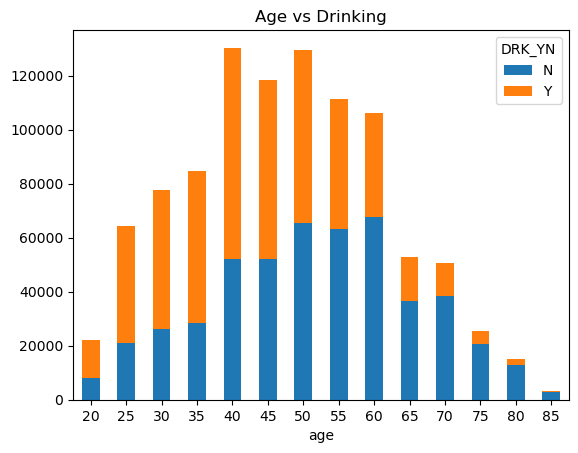

In [13]:
# Plotting a stacked bar graph for the age and drinking
df.groupby(['age', 'DRK_YN']).size().unstack().plot(
    kind='bar', stacked=True, rot=0, title="Age vs Drinking")

Seems like people older than 45 are more likely to smoke


<Axes: xlabel='age_group'>

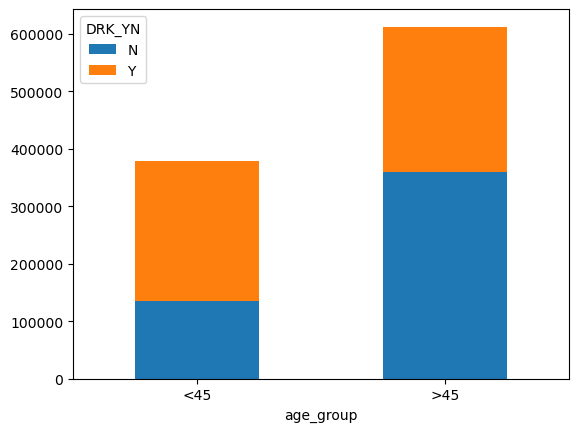

In [14]:
# Plotting a stacked bar graph for the age and smoking with only two x labels - age < 45 and age > 45
df_with_age_group = df.copy()
df_with_age_group['age_group'] = np.where(df['age'] < 45, '<45', '>45')
df_with_age_group.groupby(['age_group', 'DRK_YN']).size(
).unstack().plot(kind='bar', stacked=True, rot=0)

A better visualization for analysis would be percetanges


In [15]:
df_only_cat_age = df_with_age_group[['age_group', 'DRK_YN']].groupby(
    ['age_group', 'DRK_YN']).size().unstack()
df_only_cat_age['total'] = df_only_cat_age.sum(axis=1)
df_only_cat_age['%_drinking'] = df_only_cat_age['Y'] / \
    df_only_cat_age['total'] * 100
df_only_cat_age['%_non_drinking'] = df_only_cat_age['N'] / \
    df_only_cat_age['total'] * 100
df_only_cat_age

DRK_YN,N,Y,total,%_drinking,%_non_drinking
age_group,,,,,
<45,135942,243110,379052,64.136319,35.863681
>45,359916,252378,612294,41.218434,58.781566


<Axes: title={'center': 'Age vs Drinking'}, xlabel='age_group'>

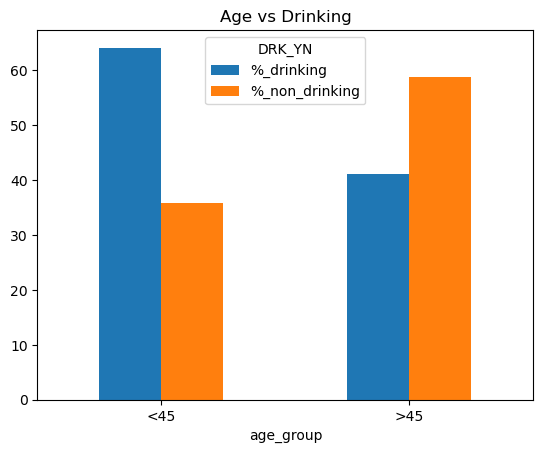

In [16]:
df_only_cat_age[['%_drinking', '%_non_drinking']].plot(
    kind='bar', stacked=False, rot=0, title="Age vs Drinking")

Age seems to be factor since people less than 45 are 23% more likely to be drinkers


### 2. BMI vs Drinking


In [17]:
# Showing the correlation between the variables height and weight and drinking
print("Height and Drinking Correlation: ",
      df_copy['height'].corr(df_copy['DRK_YN']))
print("Weight and Drinking Correlation: ",
      df_copy['weight'].corr(df_copy['DRK_YN']))

Height and Drinking Correlation:  0.37456561037158115
Weight and Drinking Correlation:  0.2642819717766194


In [18]:
df_bmi = df.copy()
df_bmi["BMI"] = df_bmi["weight"] / (df_bmi["height"] / 100) ** 2
# Removing all columns except BMI and DRK_YN
df_bmi = df_bmi[['weight', 'height', 'BMI', 'DRK_YN']]

# df_bmi[df_bmi['BMI'] < 18.5] = 'Underweight'
# df_bmi[(df_bmi['BMI'] > 18.5) & (df_bmi['BMI'] < 25)] = 'Normal'
# df_bmi[(df_bmi['BMI'] > 25) & (df_bmi['BMI'] < 30)] = 'Overweight'
# df_bmi[(df_bmi['BMI'] > 30) & (df_bmi['BMI'] < 35)] = 'Obese'
# df_bmi[(df_bmi['BMI'] > 35) & (df_bmi['BMI'] < 40)] = 'Severely Obese'

# Sorting the dataframe by BMI
df_bmi = df_bmi.sort_values(by=['BMI'])

In [19]:
# Heatmap for BMI and Drinking
df_bmi_heat = df_bmi.copy()
# df_bmi_heat.set_index('BMI', inplace=True)
df_bmi_heat.drop(columns=['weight', 'height'], inplace=True)

df_bmi_heat['DRK_YN'] = df_bmi_heat['DRK_YN'].replace('Y', 1)
df_bmi_heat['DRK_YN'] = df_bmi_heat['DRK_YN'].replace('N', 0)

# Finding correlation between BMI and Drinking
print("The correlation between BMI and drinking : ",
      df_bmi_heat['BMI'].corr(df_bmi_heat['DRK_YN']))

The correlation between BMI and drinking :  0.06029761963973562


It seems that BMI and drinking dont seem to have a very high correlation despite height and weight having a good correlation value. <br>
Let us try to visualize that


<Axes: title={'center': 'BMI vs Drinking'}, xlabel='BMI_CAT'>

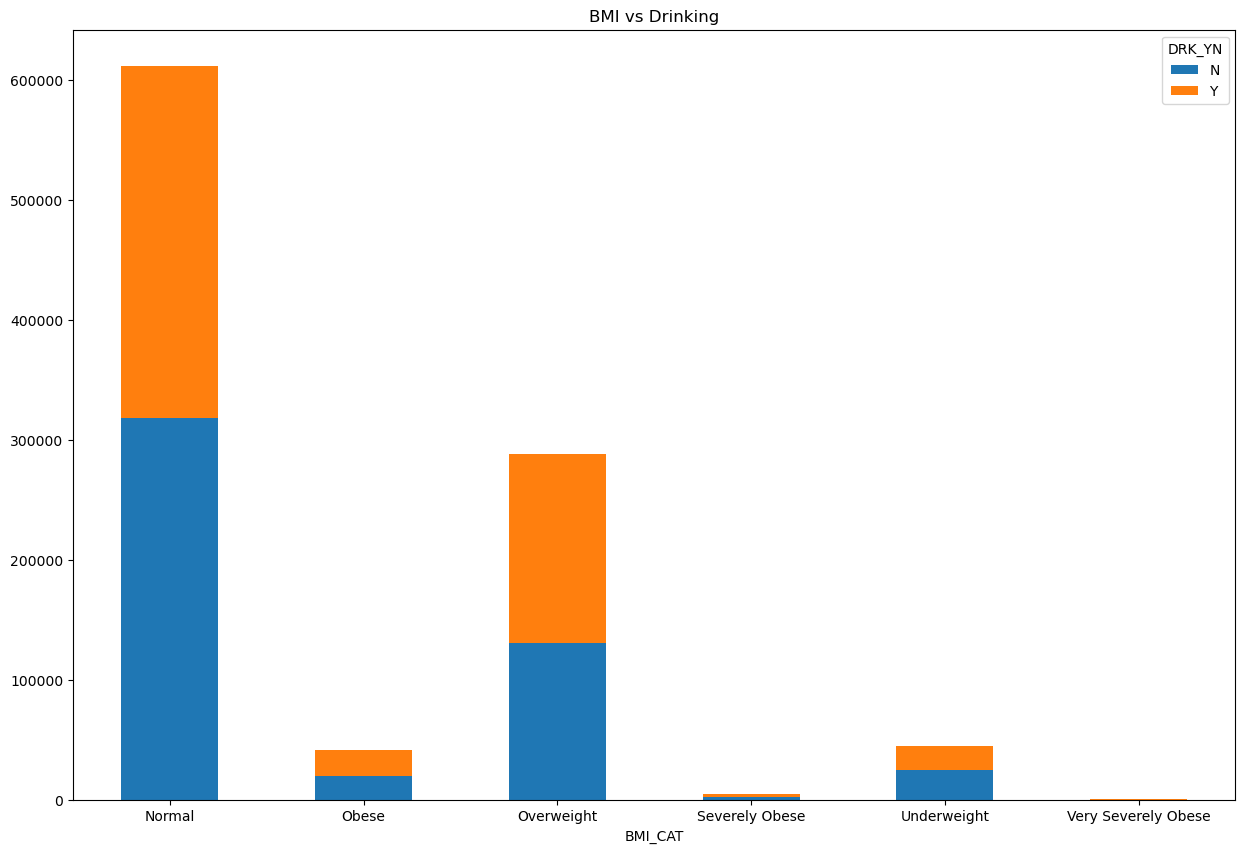

In [20]:
# Grouping the BMI and Drinking into a new dataframe
df_bmi_cat = df_bmi.groupby(['BMI', 'DRK_YN']).size().unstack()

# Cleaning the data
df_bmi_cat = df_bmi_cat.fillna(0)

# Replacing the BMI values with the category
df_bmi_cat["BMI_CAT"] = np.where(df_bmi_cat.index < 18.5, 'Underweight', np.where(df_bmi_cat.index < 25, 'Normal', np.where(
    df_bmi_cat.index < 30, 'Overweight', np.where(df_bmi_cat.index < 35, 'Obese', np.where(df_bmi_cat.index < 40, 'Severely Obese', 'Very Severely Obese')))))
df_bmi_cat.set_index("BMI_CAT", inplace=True)
df_bmi_cat = df_bmi_cat[['N', 'Y']]
df_bmi_cat = df_bmi_cat.groupby(['BMI_CAT']).sum()

# Plotting the stacked bar graph for BMI and Drinking
df_bmi_cat.plot(kind='bar', stacked=True, rot=0,
                title="BMI vs Drinking", figsize=(15, 10))

Converting the above to percentages


In [21]:
# Converting the previous to percentages

df_bmi_cat['total'] = df_bmi_cat.sum(axis=1)
df_bmi_cat['%_drinking'] = df_bmi_cat['Y']/df_bmi_cat['total'] * 100
df_bmi_cat['%_non_drinking'] = df_bmi_cat['N']/df_bmi_cat['total'] * 100
df_bmi_cat


DRK_YN,N,Y,total,%_drinking,%_non_drinking
BMI_CAT,,,,,
Normal,317972.0,293437.0,611409.0,47.993569,52.006431
Obese,19755.0,21827.0,41582.0,52.491463,47.508537
Overweight,130901.0,157552.0,288453.0,54.619643,45.380357
Severely Obese,2371.0,2234.0,4605.0,48.512486,51.487514
Underweight,24765.0,20320.0,45085.0,45.070423,54.929577
Very Severely Obese,94.0,118.0,212.0,55.660377,44.339623


<Axes: title={'center': 'BMI vs Drinking'}, xlabel='BMI_CAT'>

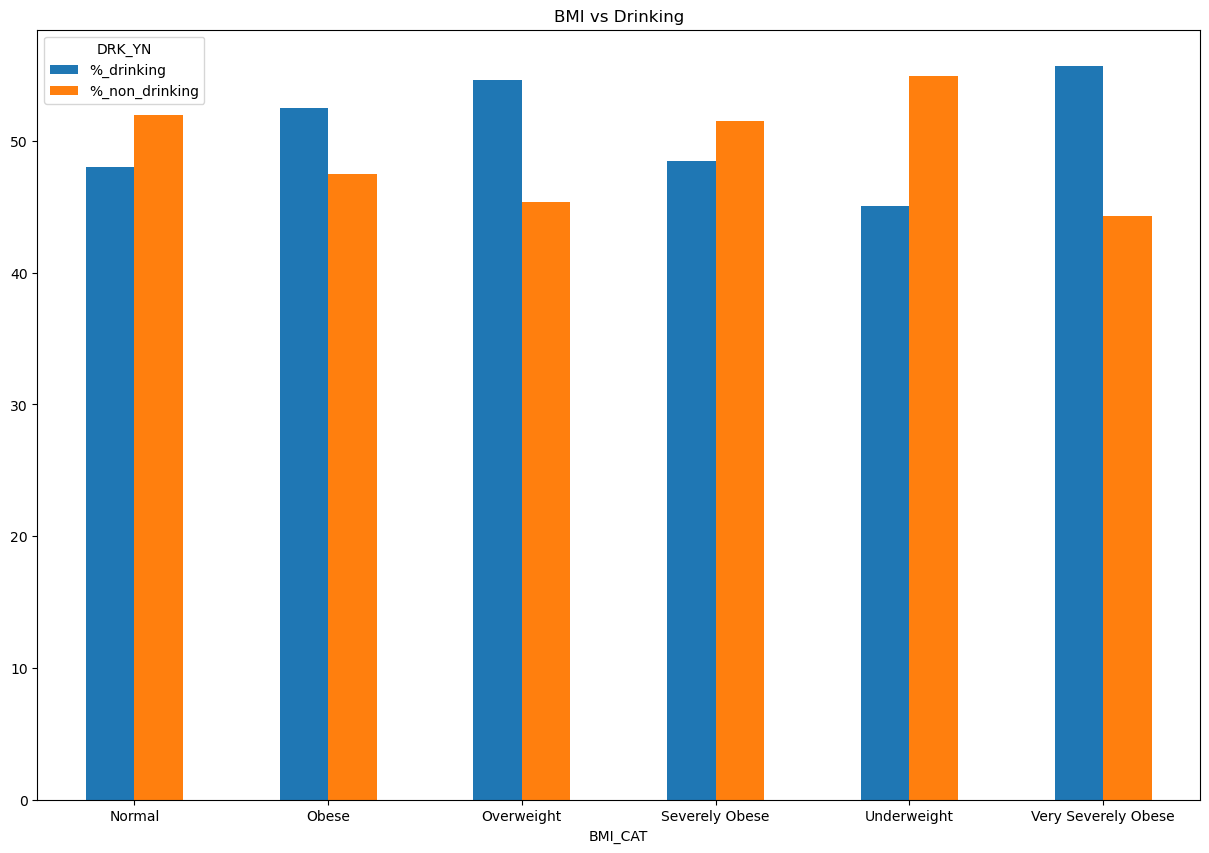

In [22]:
df_bmi_cat[['%_drinking', '%_non_drinking']].plot(
    kind='bar', stacked=False, rot=0, title="BMI vs Drinking", figsize=(15, 10))

In [23]:
# Giving the normal and overweight people a new category
df_bmi_cat['BMI_CAT'] = np.where(df_bmi_cat.index == 'Normal', 'Normal or Underweight', np.where(df_bmi_cat.index == 'Overweight', 'Overweight', np.where(
    df_bmi_cat.index == 'Underweight', 'Normal or Underweight', np.where(df_bmi_cat.index == 'Obese', 'Overweight', np.where(df_bmi_cat.index == 'Severely Obese', 'Overweight', 'Overweight')))))
df_bmi_cat.set_index("BMI_CAT", inplace=True)
df_bmi_cat = df_bmi_cat[['Y', 'N']]
df_bmi_cat = df_bmi_cat.groupby(['BMI_CAT']).sum()
df_bmi_cat

DRK_YN,Y,N
BMI_CAT,,
Normal or Underweight,313757.0,342737.0
Overweight,181731.0,153121.0


<Axes: title={'center': 'BMI vs Drinking'}, xlabel='BMI_CAT'>

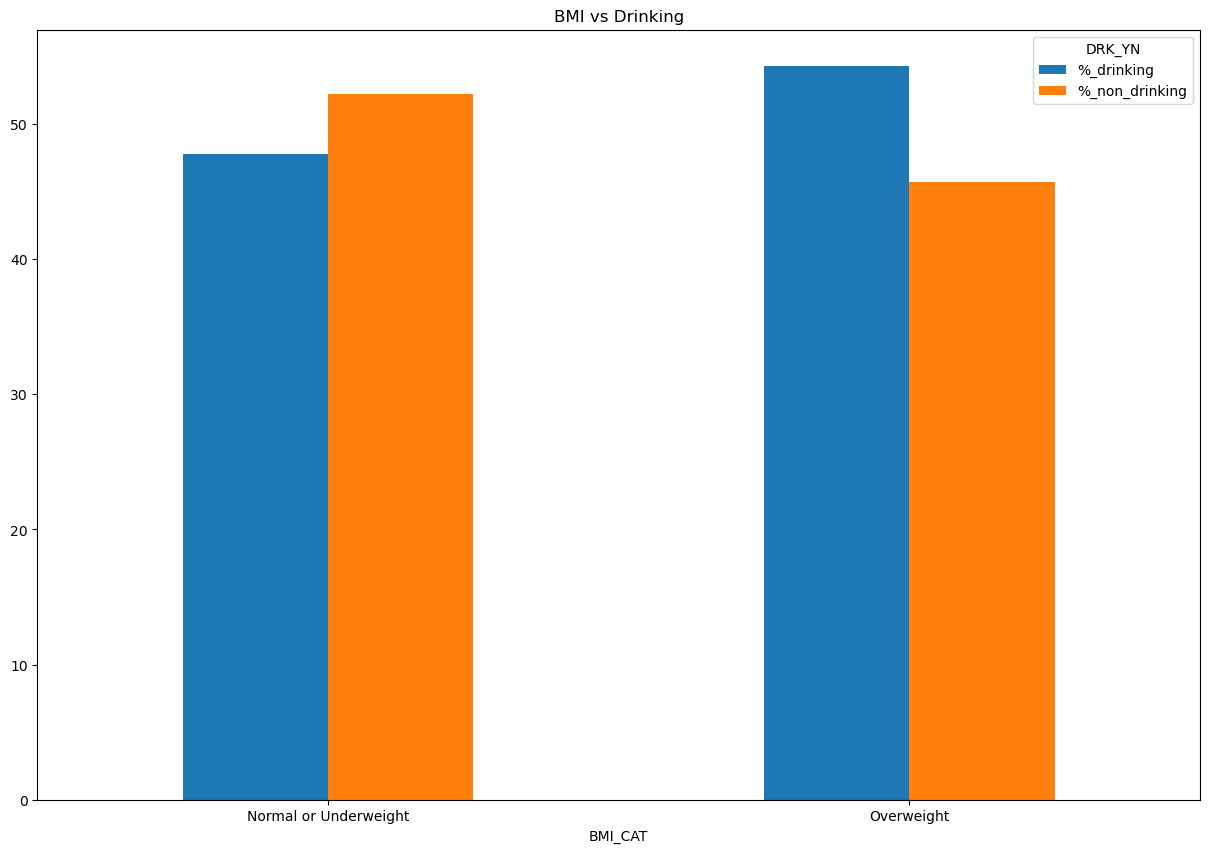

In [24]:
# Now converting these to percentages
df_bmi_cat['total'] = df_bmi_cat.sum(axis=1)
df_bmi_cat['%_drinking'] = df_bmi_cat['Y']/df_bmi_cat['total'] * 100
df_bmi_cat['%_non_drinking'] = df_bmi_cat['N']/df_bmi_cat['total'] * 100
df_bmi_cat.drop(columns=['total', 'Y', 'N'], inplace=True)

df_bmi_cat.plot(kind='bar', stacked=False, rot=0,
                title="BMI vs Drinking", figsize=(15, 10))

Here we can see that the people who have a normal or less than normal BMI have a relatively small chance of being drinkers when compared to people with above normal BMIs


### _3. Sex vs Drinking_


In [25]:
print("Sex and drinking correlation : ", df_copy['sex'].replace(
    'Male', 1).replace('Female', 0).corr(df_copy['DRK_YN']))

Sex and drinking correlation :  0.36872562951928495


Let us visualize the above correlation


<Axes: xlabel='sex'>

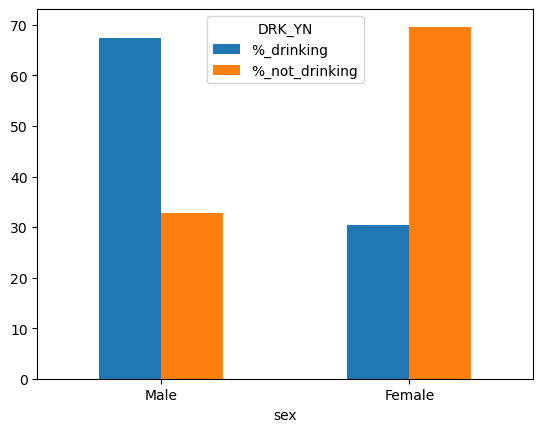

In [26]:
df_sex = df.copy()[['sex', 'DRK_YN']]
df_sex = df_sex.groupby(['DRK_YN', 'sex']).size().unstack().transpose()
df_sex

# Converting the previous to percentages
df_sex['total'] = df_sex.sum(axis=1)
df_sex['%_drinking'] = df_sex['Y']/df_sex['total'] * 100
df_sex['%_not_drinking'] = df_sex['N']/df_sex['total'] * 100

# Reverse the order
df_sex.sort_index(ascending=False, inplace=True)
df_sex[['%_drinking', '%_not_drinking']].plot(kind='bar', rot=0)


Very clear correlation between sex and drinking


### _4. Sight vs Drinking_


In [27]:
df_sight = df.copy()[['sight_left', 'sight_right', 'DRK_YN']]
df_sight['sight'] = (df_sight['sight_left'] + df_sight['sight_right']) / 2
df_sight.drop(columns=['sight_left', 'sight_right'], inplace=True)
df_sight = df_sight[['sight', 'DRK_YN']]

df_sight['DRK_YN'] = np.where(df['DRK_YN'] == 'Y', 1, 0)

df_sight.sort_values(by='sight', inplace=True)
df_sight

,sight,DRK_YN
765119,0.1,0
186462,0.1,1
688518,0.1,1
893693,0.1,1
827128,0.1,0
...,...,...
841505,9.9,1
640596,9.9,0
677903,9.9,0
354086,9.9,0


/var/folders/yw/g5dzx43n0w92csjc3pypf8mc0000gp/T/ipykernel_83808/674030437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sight['sight'])


<Axes: xlabel='sight', ylabel='Density'>

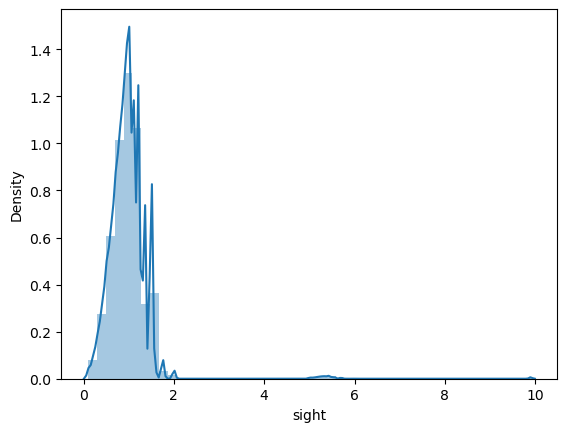

In [28]:
sns.distplot(df_sight['sight'])


In [29]:
# Write code for the correlation between sight and drinking
print("Sight and drinking correlation : ",
      df_sight['sight'].corr(df_sight['DRK_YN']))

Sight and drinking correlation :  0.09409395349797055


<Axes: xlabel='DRK_YN', ylabel='DRK_YN'>

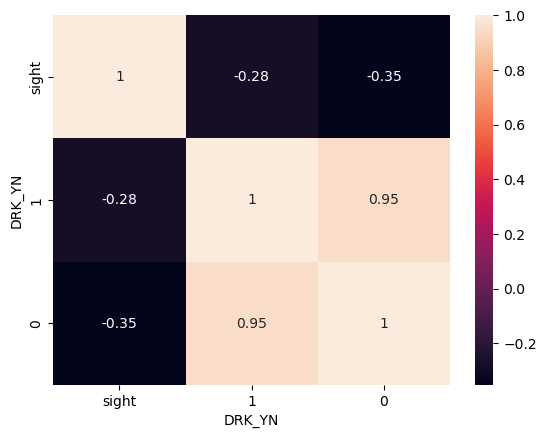

In [30]:
# Uncomment this ONLY for testing

df_sight = df.copy()[['sight_left', 'sight_right', 'DRK_YN']]
df_sight['sight'] = (df_sight['sight_left'] + df_sight['sight_right']) / 2
df_sight.drop(columns=['sight_left', 'sight_right'], inplace=True)
df_sight = df_sight[['sight', 'DRK_YN']]

df_sight['DRK_YN'] = np.where(df['DRK_YN']=='Y', 1, 0)

# Grouping the sight and drinking into a new dataframe to find the number of people drinking for every sight value

df_sight = df_sight.groupby(['sight', 'DRK_YN']).size().unstack()
df_sight.fillna(0, inplace=True)
df_sight['sight'] = df_sight.index
# df_sight['sight'] = df_sight['sight'].astype(int)
df_sight.set_index(np.arange(0, len(df_sight)), inplace=True)
df_sight.sort_values(by='sight', inplace=True)
df_sight = df_sight[['sight', 1, 0]]

sns.heatmap(df_sight.corr(), annot=True)


Plotting the numbers on a line graph with a limit of 3 as the sight to remove outliers

Text(0, 0.5, 'Number of People')

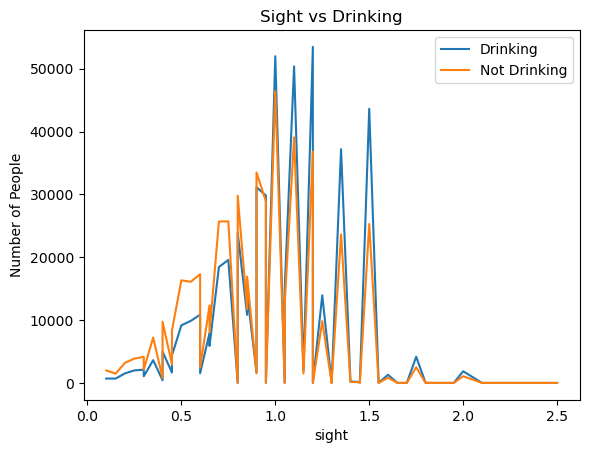

In [31]:
df_sight = df_sight[df_sight['sight'] < 3]

sns.lineplot(x='sight', y=1, data=df_sight, markers=True,
             legend='brief', err_style=None)
sns.lineplot(x='sight', y=0, data=df_sight, markers=True,
             legend='brief', err_style=None)

plt.legend(['Drinking', 'Not Drinking'])
plt.title('Sight vs Drinking')
plt.ylabel('Number of People')

It would seem the data is very skewed as we dont have a lot of data for certain eye sight levels
This explains the rapid drops in the graph
So we will remove the entries where the total is less than 5000

Text(0, 0.5, 'Number of People')

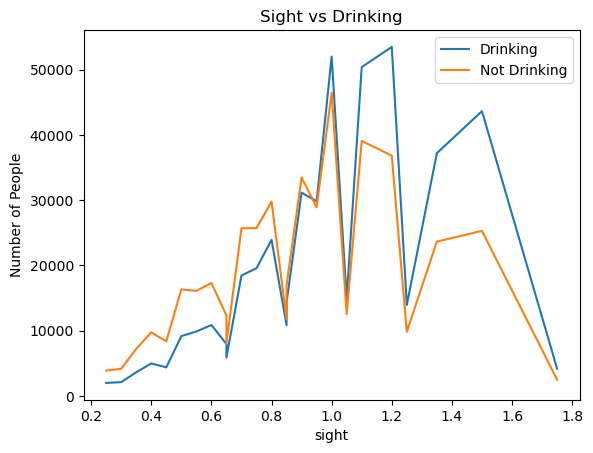

In [32]:
# Removing the points where the total number is less than 5000
df_sight = df_sight[df_sight[1] + df_sight[0] > 5000]

sns.lineplot(x='sight', y=1, data=df_sight, markers=True,
             legend='brief', err_style=None)
sns.lineplot(x='sight', y=0, data=df_sight, markers=True,
             legend='brief', err_style=None)

plt.legend(['Drinking', 'Not Drinking'])
plt.title('Sight vs Drinking')
plt.ylabel('Number of People')

In [33]:
# Dividing the sight into categories : <0.8, >0.8 and <1.1, >1.1

df_sight['sight_cat'] = np.where(df_sight['sight'] < 0.8, '<0.8', np.where(
    df_sight['sight'] < 1.2, '0.8-1.2', '>1.2'))
df_sight = df_sight[['sight_cat', 1, 0]]
df_sight = df_sight.groupby(['sight_cat']).sum()

# Converting the previous to percentages and plotting the bar graph and pie chart
df_sight['total'] = df_sight.sum(axis=1)
df_sight['%_drinking'] = df_sight[1]/df_sight['total'] * 100
df_sight['%_not_drinking'] = df_sight[0]/df_sight['total'] * 100
df_sight.drop(columns=['total', 1, 0], inplace=True)
df_sight

DRK_YN,%_drinking,%_not_drinking
sight_cat,,
0.8-1.2,50.933932,49.066068
<0.8,38.962268,61.037732
>1.2,60.848957,39.151043


array([<Axes: ylabel='%_drinking'>, <Axes: ylabel='%_not_drinking'>],
      dtype=object)

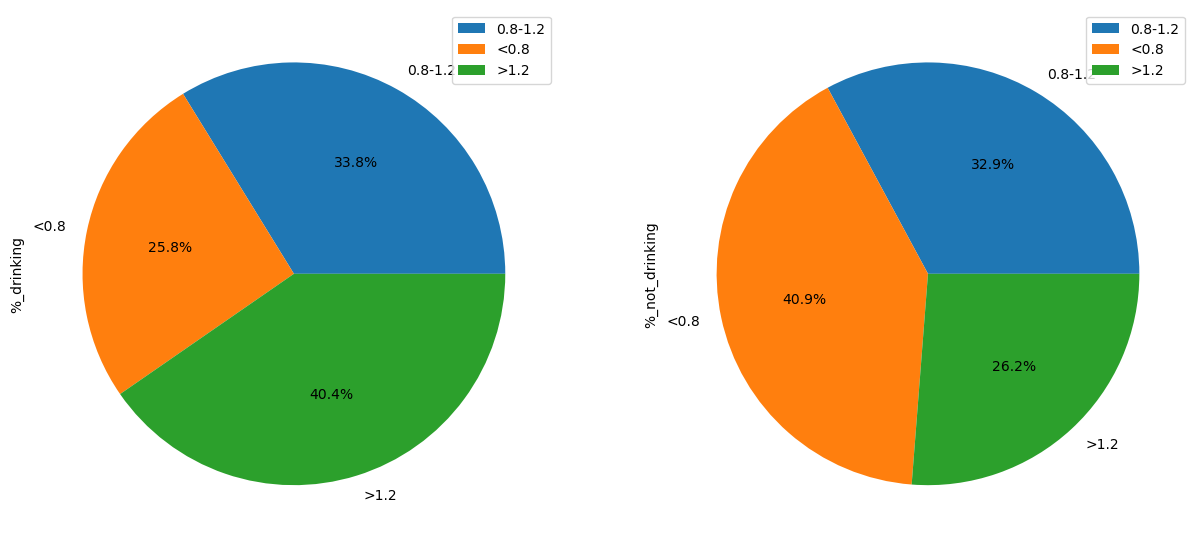

In [34]:
# Plotting a pie chart for the sight and drinking
df_sight.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%')


Text(0, 0.5, 'Percentage of People')

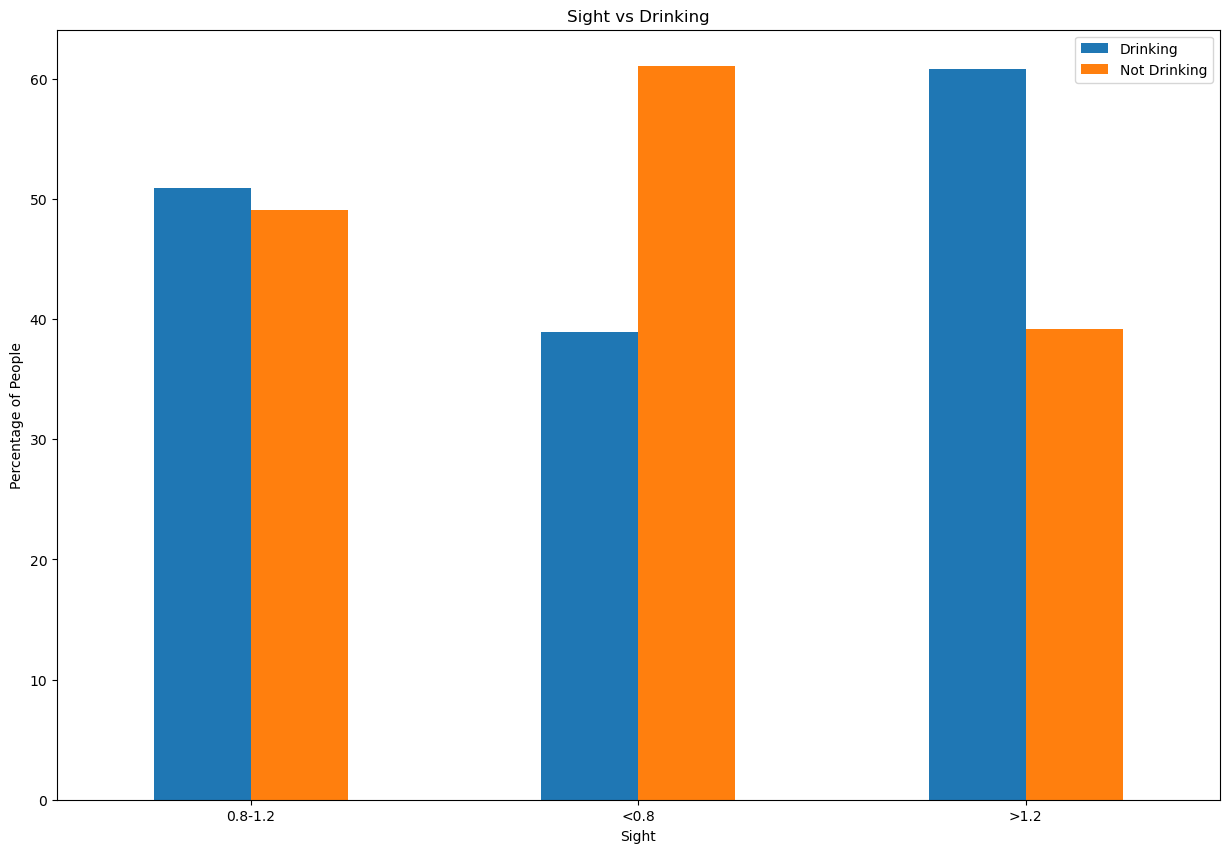

In [35]:
# Plotting a stacked bar graph for the sight and drinking
df_sight.plot(kind='bar', stacked=False, rot=0,
                title="Sight vs Drinking", figsize=(15, 10))
plt.legend(['Drinking', 'Not Drinking'])
plt.xlabel('Sight')
plt.ylabel('Percentage of People')

This shows a relation between sight and percentage of drinkers <br>
`Sight < 0.8` - _More chance_ of finding non drinkers (Around **58%** more) <br>
`Sight between 0.8 and 1.2 `- _Equal chance_ of finding drinkers and non drinkers <br>
`Sight > 1.2` - _More chance_ of finding drinker (Again, around **58%** more)

### _5. Drinking vs Hemoglobin_

/var/folders/yw/g5dzx43n0w92csjc3pypf8mc0000gp/T/ipykernel_83808/2141146675.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hemo['hemoglobin'])


<Axes: xlabel='hemoglobin', ylabel='Density'>

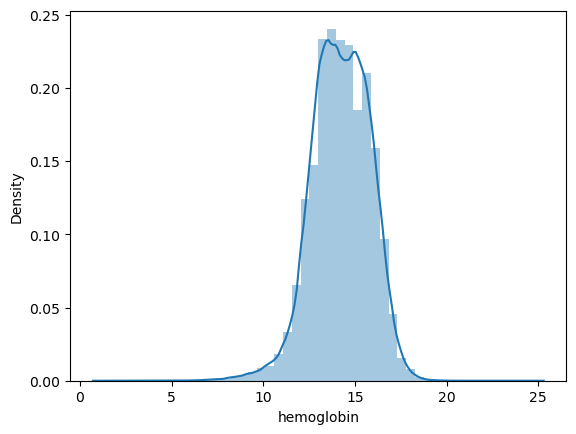

In [36]:
# Assigning a new dataframe for the haemoglobin and drinking and plotting a distribution plot for hemoglobin
df_hemo = df_copy.copy()[['hemoglobin', 'DRK_YN']]
sns.distplot(df_hemo['hemoglobin'])

In [37]:
print("Haemoglobin and drinking correlation : ",
      df_hemo['hemoglobin'].corr(df_hemo['DRK_YN']))

Haemoglobin and drinking correlation :  0.29934081121757106


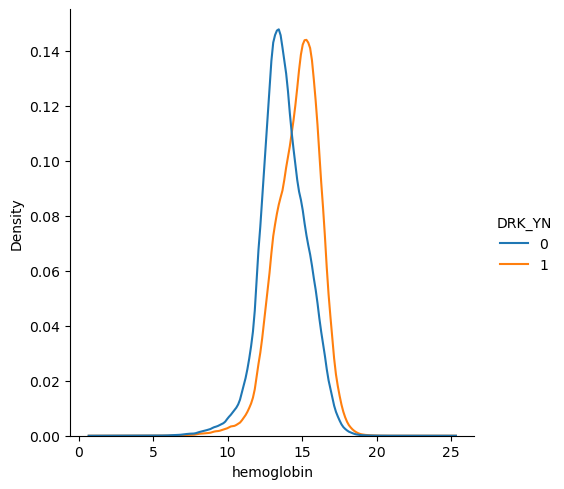

In [38]:
sns.displot(df_hemo, x='hemoglobin', hue='DRK_YN', kind='kde')

<Axes: xlabel='DRK_YN', ylabel='hemoglobin'>

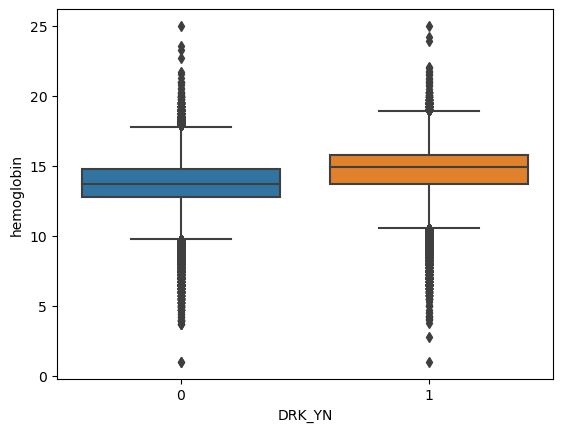

In [39]:
sns.boxplot(x='DRK_YN', y='hemoglobin', data=df_hemo)

Let us first remove the outliers from this set

<Axes: xlabel='DRK_YN', ylabel='hemoglobin'>

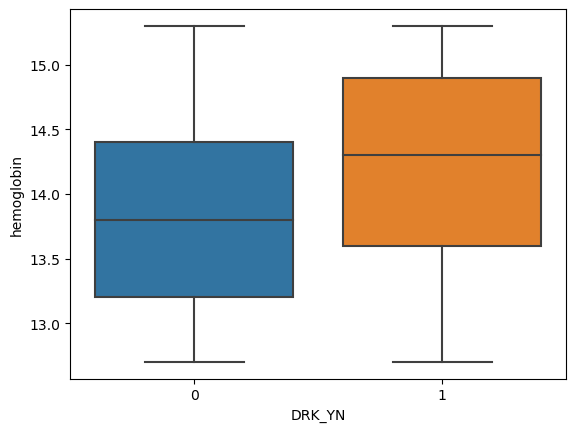

In [40]:
# Removing outliers from the hemoglobin
df_hemo = df_hemo[df_hemo['hemoglobin'] < 15.4]
df_hemo = df_hemo[df_hemo['hemoglobin'] > 12.6]

sns.boxplot(x='DRK_YN', y='hemoglobin', data=df_hemo)

Removed the outliers from the dataset

Now lets plot a distribution graph to see the distribution of the data to find the correlation between the two columns

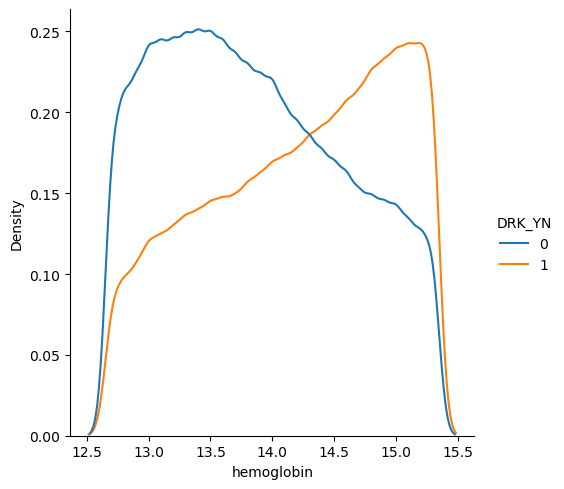

In [41]:
sns.displot(df_hemo, x='hemoglobin', hue='DRK_YN', kind='kde')

In [42]:
print("Haemoglobin and drinking correlation : ",
        df_hemo['hemoglobin'].corr(df_hemo['DRK_YN']))


Haemoglobin and drinking correlation :  0.2308405262777958


Lets start grouping them now

In [43]:
df_hemo = df_hemo.groupby(['hemoglobin', 'DRK_YN']).size().unstack()
df_hemo.fillna(0, inplace=True)
df_hemo['hemoglobin'] = df_hemo.index
df_hemo.set_index(np.arange(0, len(df_hemo)), inplace=True)
df_hemo.sort_values(by='hemoglobin', inplace=True)
df_hemo = df_hemo[['hemoglobin', 1, 0]]
df_hemo

DRK_YN,hemoglobin,1,0
0,12.7,5327,11407
1,12.8,5767,12605
2,12.9,6189,13091
3,13.0,7235,14340
4,13.1,7299,14375
5,13.2,7638,14409
6,13.3,8084,14650
7,13.4,8185,14761
8,13.5,8573,14724
9,13.6,8690,14403


Text(0.5, 0, 'Haemoglobin')

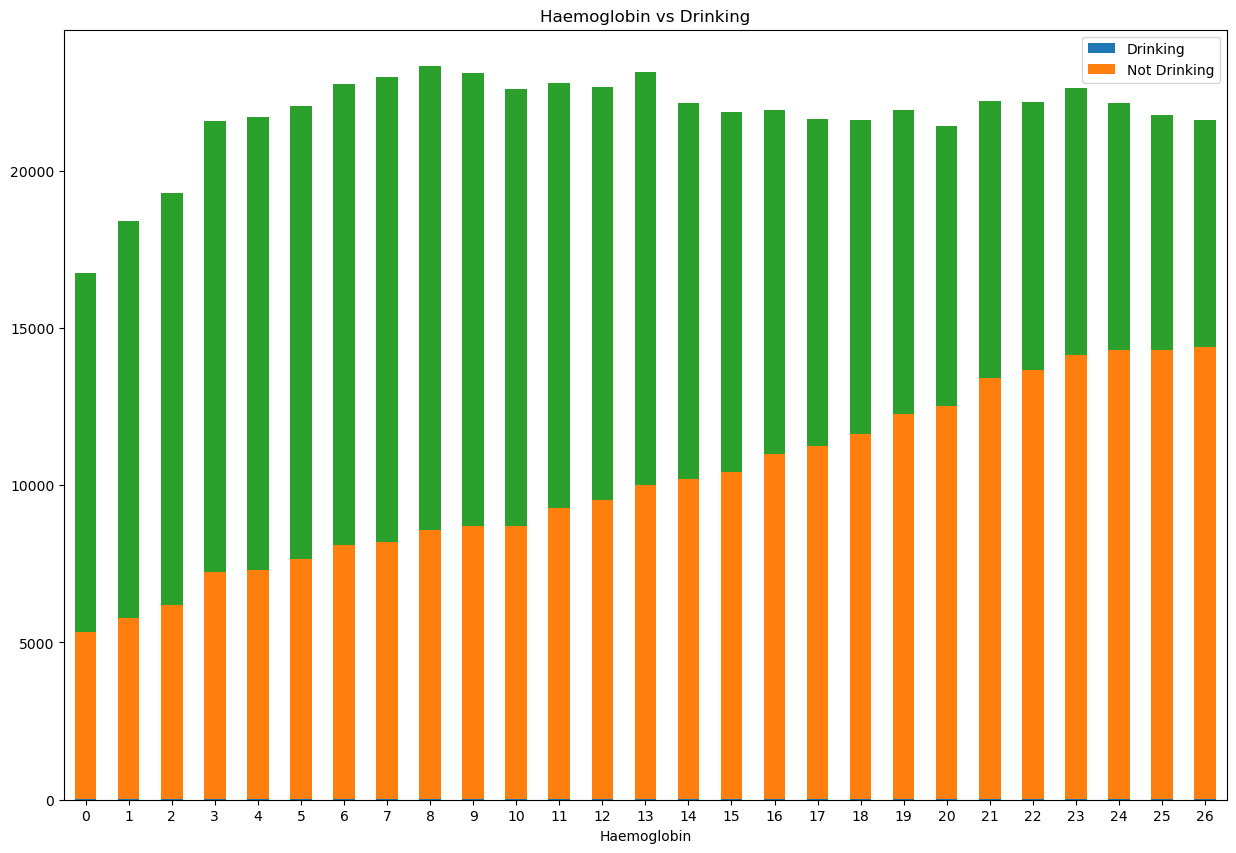

In [44]:
df_hemo.plot(kind='bar', stacked=True, rot=0,
                title="Haemoglobin vs Drinking", figsize=(15, 10))
plt.legend(['Drinking', 'Not Drinking'])
plt.xlabel('Haemoglobin')

We can see that the people with higher hemoglobin levels are more likely to be drinkers

<Axes: xlabel='hemoglobin', ylabel='1'>

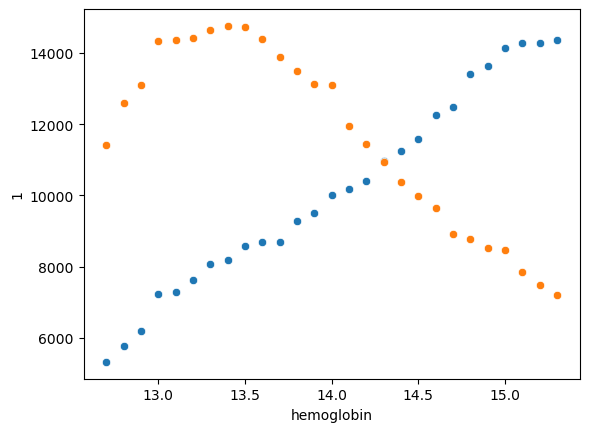

In [45]:
# Plotting a scatter plot for the haemoglobin and drinking
sns.scatterplot(x='hemoglobin', y=1, data=df_hemo)
sns.scatterplot(x='hemoglobin', y=0, data=df_hemo)

Lets try Linear Regression to see if we can find a correlation

The score for the linear regression model for drinkers is :  0.9838031939199805
The score for the linear regression model for non-drinkers is :  0.9436259296924638


<Axes: xlabel='hemoglobin', ylabel='1'>

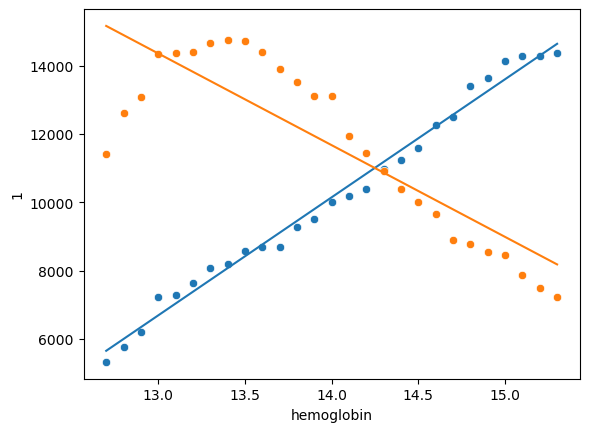

In [80]:
# Doing linear regression for the haemoglobin and drinking
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_hemo[['hemoglobin']]
y1 = df_hemo[1]
y0 = df_hemo[0]

X0_train, X0_test, y0_train, y0_test = train_test_split(X, y0, test_size=0.2)
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2)

model0 = LinearRegression()
model0.fit(X0_train, y0_train)

model1 = LinearRegression()
model1.fit(X_train, y1_train)

print("The score for the linear regression model for drinkers is : ", model1.score(X_test, y1_test))
print("The score for the linear regression model for non-drinkers is : ", model0.score(X0_test, y0_test))

# Plotting the linear regression line
sns.scatterplot(x='hemoglobin', y=1, data=df_hemo)
sns.scatterplot(x='hemoglobin', y=0, data=df_hemo)
sns.lineplot(x='hemoglobin', y=model1.predict(df_hemo[['hemoglobin']]), data=df_hemo)
sns.lineplot(x='hemoglobin', y=model0.predict(df_hemo[['hemoglobin']]), data=df_hemo)

* There seems to be a `linear relation` between hemoglobin and drinking since the R1 score is 0.98 and even R2 score is 0.82 <br>
* This suggests that hemoglobin is a good indicator of drinking status and `higher hemoglobin levels are more likely to be drinkers`

### _6. Smoking vs Drinking_

In [76]:
df_smk = df_copy.copy()[['SMK_stat_type_cd', 'DRK_YN']]
df_smk.rename(columns={'SMK_stat_type_cd': 'smoking'}, inplace=True)

df_smk

,smoking,DRK_YN
0,1,1
1,3,0
2,1,0
3,1,0
4,1,0
...,...,...
991341,1,0
991342,1,0
991343,3,1
991344,1,0


In [77]:
# Showing the correlation between smoking and drinking
print("Smoking and drinking correlation : ",
        df_smk['smoking'].corr(df_smk['DRK_YN']))

Smoking and drinking correlation :  0.3507836483839069


In [78]:
# Showing graph for smoking and drinking
df_smk = df_smk.groupby(['smoking', 'DRK_YN']).size().unstack()
df_smk.fillna(0, inplace=True)
df_smk['smoking'] = df_smk.index
df_smk.set_index(np.arange(0, len(df_smk)), inplace=True)
df_smk.sort_values(by='smoking', inplace=True)
df_smk = df_smk[['smoking', 1, 0]]

# Change the x axis labels to 'Never', 'Former', 'Current'
df_smk['smoking'] = np.where(df_smk['smoking'] == 1, 'Non-Smoker', np.where(
    df_smk['smoking'] == 2, 'Former-Smoker', 'Current-Smoker'))

df_smk

DRK_YN,smoking,1,0
0,Non-Smoker,213431,389010
1,Former-Smoker,120480,54471
2,Current-Smoker,161577,52377


Text(0, 0.5, 'Number of People')

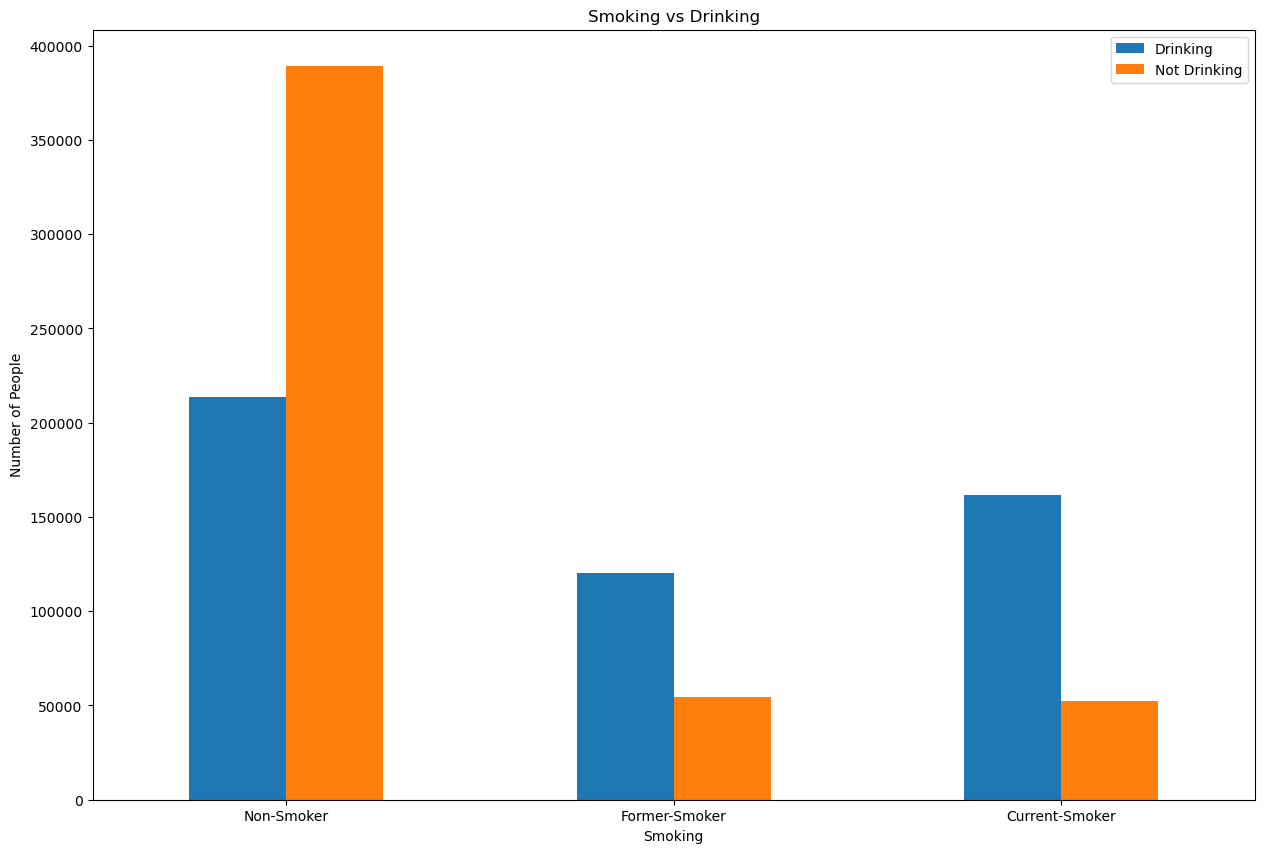

In [79]:
# Plotting a stacked bar graph for smoking and drinking
df_smk.plot(x='smoking', kind='bar', stacked=False, rot=0,
                title="Smoking vs Drinking", figsize=(15, 10))
plt.legend(['Drinking', 'Not Drinking'])
plt.xlabel('Smoking')
plt.ylabel('Number of People')

Theres a clear correlation that non-smokers are less likely to be drinkers and former/currently smoking people are more likely to be drinkers <br>
1. `Non-smokers` : *__82%__* more chance of being __*non-drinkers*__ <br>
2. `Former smokers` : *__121%__* more chance of being __*drinkers*__ <br>
3. `Current smokers` : *__208.4%__* more chance of being __*drinkers*__ <br>